In [1]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
ds = pd.read_csv("test_data.csv")
ds

,id,created_at,updated_at,deleted_at,user_id,producto_id,pedido_id,tienda_id,faltante_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_anulada,cantidad_faltante,costo_actual
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,2022-07-07 06:28:09,24570,10,0,1,NaN,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,NaN,0.0,NaN
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,2022-03-06 21:39:24,24252,1164,68834,1,NaN,Berros 100g,100 g,780,1.0,1.0,2024-02-01,NaN,0.0,NaN
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,53,101286,1,NaN,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,NaN,0.0,NaN
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,232,101286,1,NaN,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,NaN,0.0,NaN
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,NaN,31695,233,101286,1,12310.0,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437770,5177988,2023-08-16 20:30:55,2023-08-16 20:30:55,NaN,2,535,183097,1,NaN,Zapallo Spaguetti,un.,1250,1.0,1.0,2023-08-17,0.0,0.0,700.0
1437771,5177989,2023-08-16 20:30:55,2023-08-16 20:30:55,NaN,2,345,183097,1,NaN,Zapallo Butternut,un.,1750,1.0,1.0,2023-08-17,0.0,0.0,720.0
1437772,5177990,2023-08-16 20:30:55,2023-08-16 20:30:55,NaN,2,566,183097,1,NaN,Tomate Cherry Romanita,500 g,2240,1.0,1.0,2023-08-17,0.0,0.0,1400.0
1437773,5177991,2023-08-16 20:30:55,2023-08-16 20:30:55,NaN,2,11,183097,1,NaN,Champiñón,200 g,1610,1.0,1.0,2023-08-17,0.0,0.0,1050.0


Al hacer una mirada rápida a la base de datos se logra ver que hay variables con datos faltantes, así que vamos a contar cuántos datos faltantes existen en la base de datos para decidir si eliminamos o si se pueden reemplazar. 

Como criterio de eliminación que uso:

- Si los datos faltantes **no superan el 20%** de los datos totales, entonces puedo **omitir aquellas filas o registros** y eliminarlas o reemplazarlas.

- Si los datos faltantes **superan el 20%** de los datos, entonces digo que aquella variable no está aportando a la base de datos entera, no podría eliminar sus filas puesto que estaría perdiendo mucha información al respecto entonces **procedo a eliminar la variable**.

**Análisis de datos faltantes:**

In [3]:
ds.isna().sum()/ds.shape[0] * 100

id                    0.000000
created_at            0.000000
updated_at            0.000000
deleted_at           86.423815
user_id               0.000000
producto_id           0.000000
pedido_id             0.000000
tienda_id             0.000000
faltante_id          98.481334
nombre                0.000000
unidad                0.000000
precio                0.000000
cantidad              0.000070
cantidad_enviada      0.002365
fecha_despacho        0.000000
cantidad_anulada     58.319765
cantidad_faltante     0.000000
costo_actual         52.155588
dtype: float64

Bueno tenemos 4 variables en donde los datos faltantes superan el 50% de sus datos, así que procederemos a eliminar estas columnas. Cómo detalle, en la columna `cantidad_enviada` hay un 0.002% de datos faltantes podía implicar unos 30 registros aproximadamente, entonces quitaré aquellas.

In [4]:
ds.drop(columns=['deleted_at','faltante_id','cantidad_anulada','costo_actual'],axis=1,inplace=True)
ds.dropna(inplace=True)
ds

,id,created_at,updated_at,user_id,producto_id,pedido_id,tienda_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_faltante
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,24570,10,0,1,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,0.0
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,24252,1164,68834,1,Berros 100g,100 g,780,1.0,1.0,2024-02-01,0.0
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,31695,53,101286,1,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,0.0
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,31695,232,101286,1,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,0.0
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,31695,233,101286,1,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437770,5177988,2023-08-16 20:30:55,2023-08-16 20:30:55,2,535,183097,1,Zapallo Spaguetti,un.,1250,1.0,1.0,2023-08-17,0.0
1437771,5177989,2023-08-16 20:30:55,2023-08-16 20:30:55,2,345,183097,1,Zapallo Butternut,un.,1750,1.0,1.0,2023-08-17,0.0
1437772,5177990,2023-08-16 20:30:55,2023-08-16 20:30:55,2,566,183097,1,Tomate Cherry Romanita,500 g,2240,1.0,1.0,2023-08-17,0.0
1437773,5177991,2023-08-16 20:30:55,2023-08-16 20:30:55,2,11,183097,1,Champiñón,200 g,1610,1.0,1.0,2023-08-17,0.0


___

__Matriz de Cohorte de Retención:__

Lo primero que hay que saber es que **cohorte** es un conjunto de usuarios que tienen características en común, como por ejemplo; un período de tiempo en donde estos usuarios estuvieron activos. Existen 3 tipos de cohortes:
 - Cohortes de tiempo: relacionado al ejemplo dado previamente.
 - Cohortes de comportamiento: depende de lo que han consumido los usuarios.
 - Cohortes de tamaño: depende del tamaño del conjunto de clientes. 

La **retención** trata de estudiar los cohortes para que los usuarios no se salgan.

Entonces esta matriz de retención de cohortes es el estudio a los usuarios para poder adquirir información de ellos y hacer algo al respecto para que no dejen de consumir el producto.

Para crear la __matriz de cohorte__ vamos a utilizar las variables en donde el usuario creó la aplicación `created_at` y tomaremos la última actualización `updated_at` cómo la última vez que el usuario utilizó la app.

Ahora vamos a manejar las variables mencionadas previamente para poder crear una matriz de cohorte mensual. Como hay muchos registros de varios meses, escogeré un mes (el más completo posible) para hacer la matriz.

In [5]:
ds.dtypes

id                     int64
created_at            object
updated_at            object
user_id                int64
producto_id            int64
pedido_id              int64
tienda_id              int64
nombre                object
unidad                object
precio                 int64
cantidad             float64
cantidad_enviada     float64
fecha_despacho        object
cantidad_faltante    float64
dtype: object

In [6]:
#pasando las variables mencionadas a tipo fecha. influirá el formato??
ds['created_at'] = pd.to_datetime(ds['created_at'],infer_datetime_format=True)
ds['updated_at'] = pd.to_datetime(ds['updated_at'],infer_datetime_format=True)
ds.dtypes

id                            int64
created_at           datetime64[ns]
updated_at           datetime64[ns]
user_id                       int64
producto_id                   int64
pedido_id                     int64
tienda_id                     int64
nombre                       object
unidad                       object
precio                        int64
cantidad                    float64
cantidad_enviada            float64
fecha_despacho               object
cantidad_faltante           float64
dtype: object

In [7]:
ds['monthly_created'] = ds['created_at'].dt.to_period('M')

In [8]:
#ds['created_year'] = ds['created_at'].dt.year
#ds['created_month'] = ds['created_at'].dt.month
#ds['created_day'] = ds['created_at'].dt.day
#ds['updated_year'] = ds['updated_at'].dt.year
#ds['updated_month'] = ds['updated_at'].dt.month
#ds['updated_day'] = ds['updated_at'].dt.day
ds

,id,created_at,updated_at,user_id,producto_id,pedido_id,tienda_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_faltante,monthly_created
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,24570,10,0,1,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,0.0,2022-07
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,24252,1164,68834,1,Berros 100g,100 g,780,1.0,1.0,2024-02-01,0.0,2021-03
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,31695,53,101286,1,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,0.0,2022-02
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,31695,232,101286,1,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,0.0,2022-02
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,31695,233,101286,1,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,3.0,2022-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437770,5177988,2023-08-16 20:30:55,2023-08-16 20:30:55,2,535,183097,1,Zapallo Spaguetti,un.,1250,1.0,1.0,2023-08-17,0.0,2023-08
1437771,5177989,2023-08-16 20:30:55,2023-08-16 20:30:55,2,345,183097,1,Zapallo Butternut,un.,1750,1.0,1.0,2023-08-17,0.0,2023-08
1437772,5177990,2023-08-16 20:30:55,2023-08-16 20:30:55,2,566,183097,1,Tomate Cherry Romanita,500 g,2240,1.0,1.0,2023-08-17,0.0,2023-08
1437773,5177991,2023-08-16 20:30:55,2023-08-16 20:30:55,2,11,183097,1,Champiñón,200 g,1610,1.0,1.0,2023-08-17,0.0,2023-08


A continuación voy a crear una variable con los menores valores con respecto a las fechas en donde se está iniciando la compra por el usuario, es decir; se detectará la fecha más temprana de actividad del usuario y se le desiganará aquel valor a la fila correspondiente a aquel usuario.

In [9]:
ds['cohort'] = ds.groupby("user_id")['created_at'].transform('min').dt.to_period('M') 
ds

,id,created_at,updated_at,user_id,producto_id,pedido_id,tienda_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_faltante,monthly_created,cohort
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,24570,10,0,1,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,0.0,2022-07,2022-03
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,24252,1164,68834,1,Berros 100g,100 g,780,1.0,1.0,2024-02-01,0.0,2021-03,2021-03
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,31695,53,101286,1,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,0.0,2022-02,2022-02
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,31695,232,101286,1,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,0.0,2022-02,2022-02
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,31695,233,101286,1,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,3.0,2022-02,2022-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437770,5177988,2023-08-16 20:30:55,2023-08-16 20:30:55,2,535,183097,1,Zapallo Spaguetti,un.,1250,1.0,1.0,2023-08-17,0.0,2023-08,2022-02
1437771,5177989,2023-08-16 20:30:55,2023-08-16 20:30:55,2,345,183097,1,Zapallo Butternut,un.,1750,1.0,1.0,2023-08-17,0.0,2023-08,2022-02
1437772,5177990,2023-08-16 20:30:55,2023-08-16 20:30:55,2,566,183097,1,Tomate Cherry Romanita,500 g,2240,1.0,1.0,2023-08-17,0.0,2023-08,2022-02
1437773,5177991,2023-08-16 20:30:55,2023-08-16 20:30:55,2,11,183097,1,Champiñón,200 g,1610,1.0,1.0,2023-08-17,0.0,2023-08,2022-02


Ahora solo queda crear un dataframe con las columnas: `Mes inicio`, `mes final`, `N_usuarios activos`, `diferencia del periodo`.

para ser un poco más ordenados, crearé un groupby para luego crear el nuevo dataframe que corresponderá la matriz de cohorte de retención por mes.

In [10]:
cohort_ds = ds.groupby(['monthly_created','cohort']).agg(num_user=('user_id','nunique')).reset_index(drop=False)
#el método nunique cuenta, en este caso, los users que hay en los rangos de los valores, en este caso, entre monthly_created y cohort.
diff = (cohort_ds['monthly_created'] - cohort_ds['cohort'])
cohort_ds['diff_period'] = diff.apply(attrgetter('n'))

In [11]:
cohort_ds

,monthly_created,cohort,num_user,diff_period
0,2021-03,2021-03,1,0
1,2022-02,2022-02,1188,0
2,2022-03,2022-02,753,1
3,2022-03,2022-03,1447,0
4,2022-04,2022-02,614,2
...,...,...,...,...
186,2023-08,2023-04,75,4
187,2023-08,2023-05,81,3
188,2023-08,2023-06,95,2
189,2023-08,2023-07,115,1


Ahora Hay que crear la tabla dinámica, que será la matriz de cohortes de retención. Para esto utilizaré el método pivot_table() de pandas.

In [12]:
retention_matrix = cohort_ds.pivot_table(values='num_user',
                                        index='cohort',
                                        columns='diff_period',
                                        )

retention_matrix

diff_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
cohort,,,,,,,,,,,,,,,,,,,
2021-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02,1188.0,753.0,614.0,603.0,542.0,475.0,455.0,412.0,408.0,409.0,391.0,325.0,306.0,314.0,292.0,299.0,267.0,270.0,205.0
2022-03,1447.0,554.0,513.0,454.0,386.0,366.0,320.0,324.0,342.0,295.0,246.0,215.0,249.0,211.0,213.0,190.0,205.0,126.0,NaN
2022-04,792.0,298.0,230.0,207.0,170.0,157.0,139.0,153.0,141.0,112.0,93.0,103.0,107.0,86.0,97.0,101.0,60.0,NaN,NaN
2022-05,862.0,326.0,247.0,185.0,169.0,159.0,150.0,137.0,110.0,98.0,118.0,103.0,104.0,87.0,78.0,47.0,NaN,NaN,NaN
2022-06,856.0,262.0,215.0,161.0,170.0,165.0,152.0,117.0,96.0,103.0,95.0,95.0,76.0,84.0,47.0,NaN,NaN,NaN,NaN
2022-07,721.0,220.0,173.0,176.0,158.0,159.0,122.0,102.0,104.0,90.0,91.0,75.0,77.0,46.0,NaN,NaN,NaN,NaN,NaN
2022-08,569.0,179.0,167.0,153.0,127.0,95.0,83.0,85.0,70.0,75.0,66.0,66.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,634.0,216.0,188.0,145.0,99.0,87.0,92.0,69.0,72.0,67.0,70.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora hay que completar esta tabla utilizando los porcentajes adecuados de la cantidad de usuarios en ciertos períodos.

In [13]:
retention_matrix2 = round(retention_matrix.divide(retention_matrix.iloc[:,0],axis=0),4)
retention_matrix2

diff_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
cohort,,,,,,,,,,,,,,,,,,,
2021-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02,1.0,0.6338,0.5168,0.5076,0.4562,0.3998,0.3830,0.3468,0.3434,0.3443,0.3291,0.2736,0.2576,0.2643,0.2458,0.2517,0.2247,0.2273,0.1726
2022-03,1.0,0.3829,0.3545,0.3138,0.2668,0.2529,0.2211,0.2239,0.2364,0.2039,0.1700,0.1486,0.1721,0.1458,0.1472,0.1313,0.1417,0.0871,NaN
2022-04,1.0,0.3763,0.2904,0.2614,0.2146,0.1982,0.1755,0.1932,0.1780,0.1414,0.1174,0.1301,0.1351,0.1086,0.1225,0.1275,0.0758,NaN,NaN
2022-05,1.0,0.3782,0.2865,0.2146,0.1961,0.1845,0.1740,0.1589,0.1276,0.1137,0.1369,0.1195,0.1206,0.1009,0.0905,0.0545,NaN,NaN,NaN
2022-06,1.0,0.3061,0.2512,0.1881,0.1986,0.1928,0.1776,0.1367,0.1121,0.1203,0.1110,0.1110,0.0888,0.0981,0.0549,NaN,NaN,NaN,NaN
2022-07,1.0,0.3051,0.2399,0.2441,0.2191,0.2205,0.1692,0.1415,0.1442,0.1248,0.1262,0.1040,0.1068,0.0638,NaN,NaN,NaN,NaN,NaN
2022-08,1.0,0.3146,0.2935,0.2689,0.2232,0.1670,0.1459,0.1494,0.1230,0.1318,0.1160,0.1160,0.0703,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,1.0,0.3407,0.2965,0.2287,0.1562,0.1372,0.1451,0.1088,0.1136,0.1057,0.1104,0.0710,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Gráfica de Matriz de Retención**

In [14]:
#Creando un dataframe para la cantidad de usuarios por rango de fecha (cohorte):
df_size = pd.DataFrame(retention_matrix.iloc[:,0]).rename(columns={0:'cohort_size'})
df_size

,cohort_size
cohort,
2021-03,1.0
2022-02,1188.0
2022-03,1447.0
2022-04,792.0
2022-05,862.0
2022-06,856.0
2022-07,721.0
2022-08,569.0
2022-09,634.0


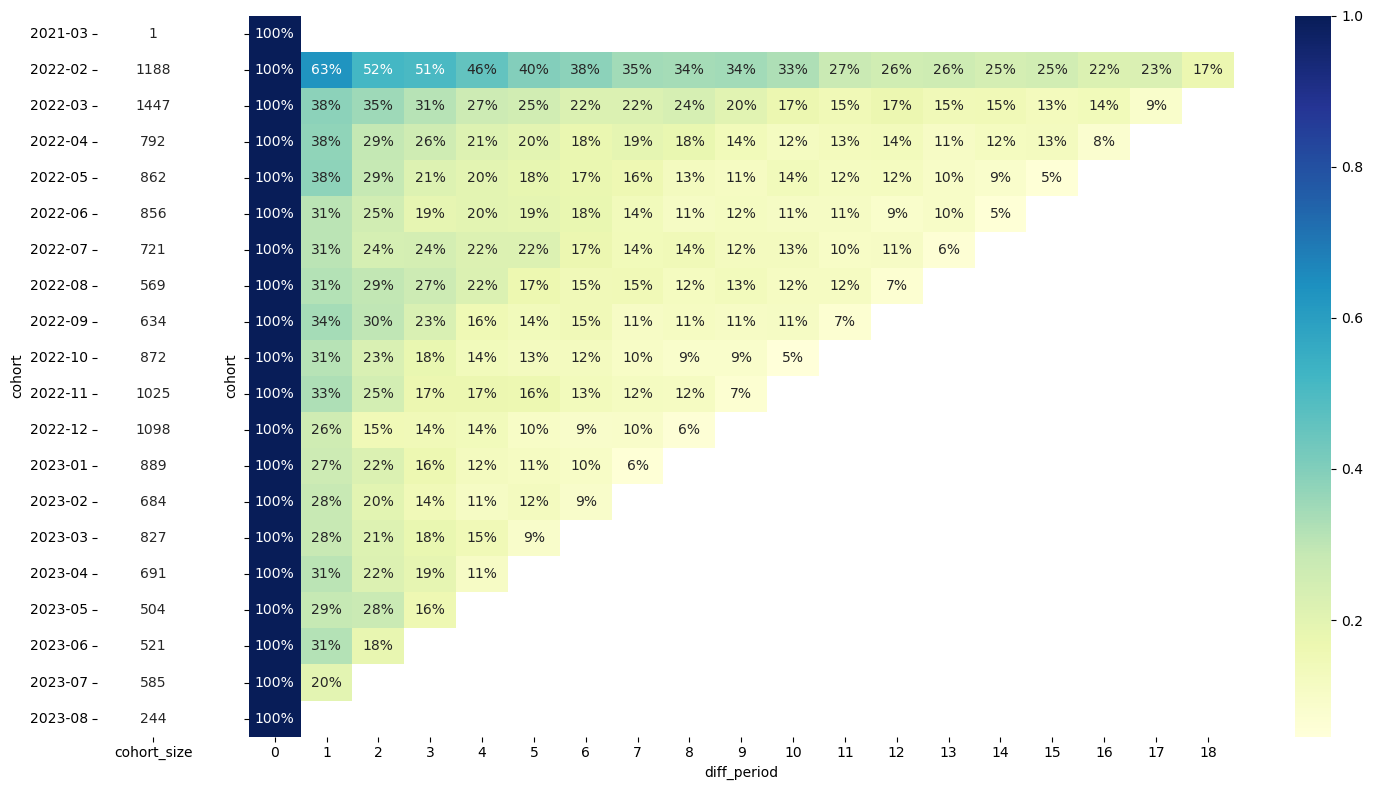

In [15]:
fig, ax = plt.subplots(1,2, figsize=[15,8], sharey=True, gridspec_kw={'width_ratios': [1, 11]})

#Cohort size

sns.heatmap(df_size,
           annot=True,
           cbar=False,
           fmt='g',
           cmap = mcolors.ListedColormap(['White']),
           ax=ax[0])

#retention matrix
sns.heatmap(retention_matrix2,
           mask = retention_matrix2.isnull(),
           annot=True,
           fmt=".0%",
           cmap='YlGnBu',
           ax=ax[1])

fig.tight_layout()


**¿Cómo leer esta matriz?**

Como se puede apreciar, esta matriz es de cohortes de retención porcentual en donde las columnas representan la diferencia de periodos o rangos en cantidad de meses con respecto a la fecha del inicio de registros. Es decir; _que la diferencia de período sea 0 significa que en este grupo están los usuarios que compraron un producto en un mes y lo usaron (o lo dejaron de usar) el producto el mismo mes. Que el valor sea 3 significa que los usuarios han estado usando el producto por 3 meses desde que lo compraron y así sucesivamente_. Las filas representan los cohortes (grupos), en cual, en este caso representan los períodos en donde los usuarios iniciaron el consumo del producto.

Dicho lo anterior, como en todos los cohortes la primera columna representa el 100% ya que aquí se registran todos los usuarios que iniciaron el consumo en un mes y como tope de uso es el mismo mes, por lo tanto en este mes no hay pérdidas y se dice que hay una retención del 100%. para las siguiente columna se encuentran los que siguieron consumiendo el producto, los que desertaron ya no se registran, entonces se toma un porcentaje de los que consumieron el segundo mes con respecto al total de consumidores que se registraron por primera vez, esto explica que el porcentaje se haya reducido, así sucesivamente columna por columna.

Ahora, podemos notar que para un período de 2 meses (diferencia de 1 mes) se tienen porcentajes sobre el 30%, esto se lee como que para este período hay una retención del 30%. para los siguientes meses la retención baja mucho hasta llegar a un 5% de retención, esto explica que los consumidores no están muy agusto con el servicio que se les está dando, por eso hay tanta desersión. Ahora la pregunta es _¿A qué se debe esto?_- Procederé a analizar los datos respecto al comportamiento de los usuarios según los productos que están presentes y de tal modo se podría explicar el alto porcentaje de desertores sobre todo para los meses del año 2023.

Es importante también ver la tasa de abandono por cohorte, es decir para los que iniciaron antes el consumo del producto la desersión es más lenta que para quienes iniciaron después. _Analizar el por qué_

---

__Análisis de Datos__

Para el análisis de los datos iré observando y obteniendo métricas para cada _cohorte_, para ver los comportamientos de los usuarios para cada grupo.

Dentro de las variables a considerar serán:
 - `Producto_id`
 - `Nombre`
 - `Precio`*`Cantidad`
 - `Cantidad_faltante`

In [16]:
def sum_cantidad_faltante(serie):
    bool_serie = df[col]!=0.0
    return bool_serie.sum()

ds['cantidad_faltante_bool'] = ds['cantidad_faltante']!=0.0

cohort_group = ds.groupby(['cohort','monthly_created'])
tupla = zip(cohort_ds['cohort'],cohort_ds['monthly_created'])
err_entrega = []
for i,(c,m) in enumerate(tupla):
    err_entrega.append(cohort_group.get_group((c,m))['cantidad_faltante_bool'].sum())
cohort_ds['err_entregas'] = err_entrega

cohort_ds

,monthly_created,cohort,num_user,diff_period,err_entregas
0,2021-03,2021-03,1,0,0
1,2022-02,2022-02,1188,0,171
2,2022-03,2022-02,753,1,182
3,2022-03,2022-03,1447,0,211
4,2022-04,2022-02,614,2,92
...,...,...,...,...,...
186,2023-08,2023-04,75,4,16
187,2023-08,2023-05,81,3,747
188,2023-08,2023-06,95,2,21
189,2023-08,2023-07,115,1,15


/tmp/ipykernel_79176/1615443709.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rango,rotation=90,fontsize=15)


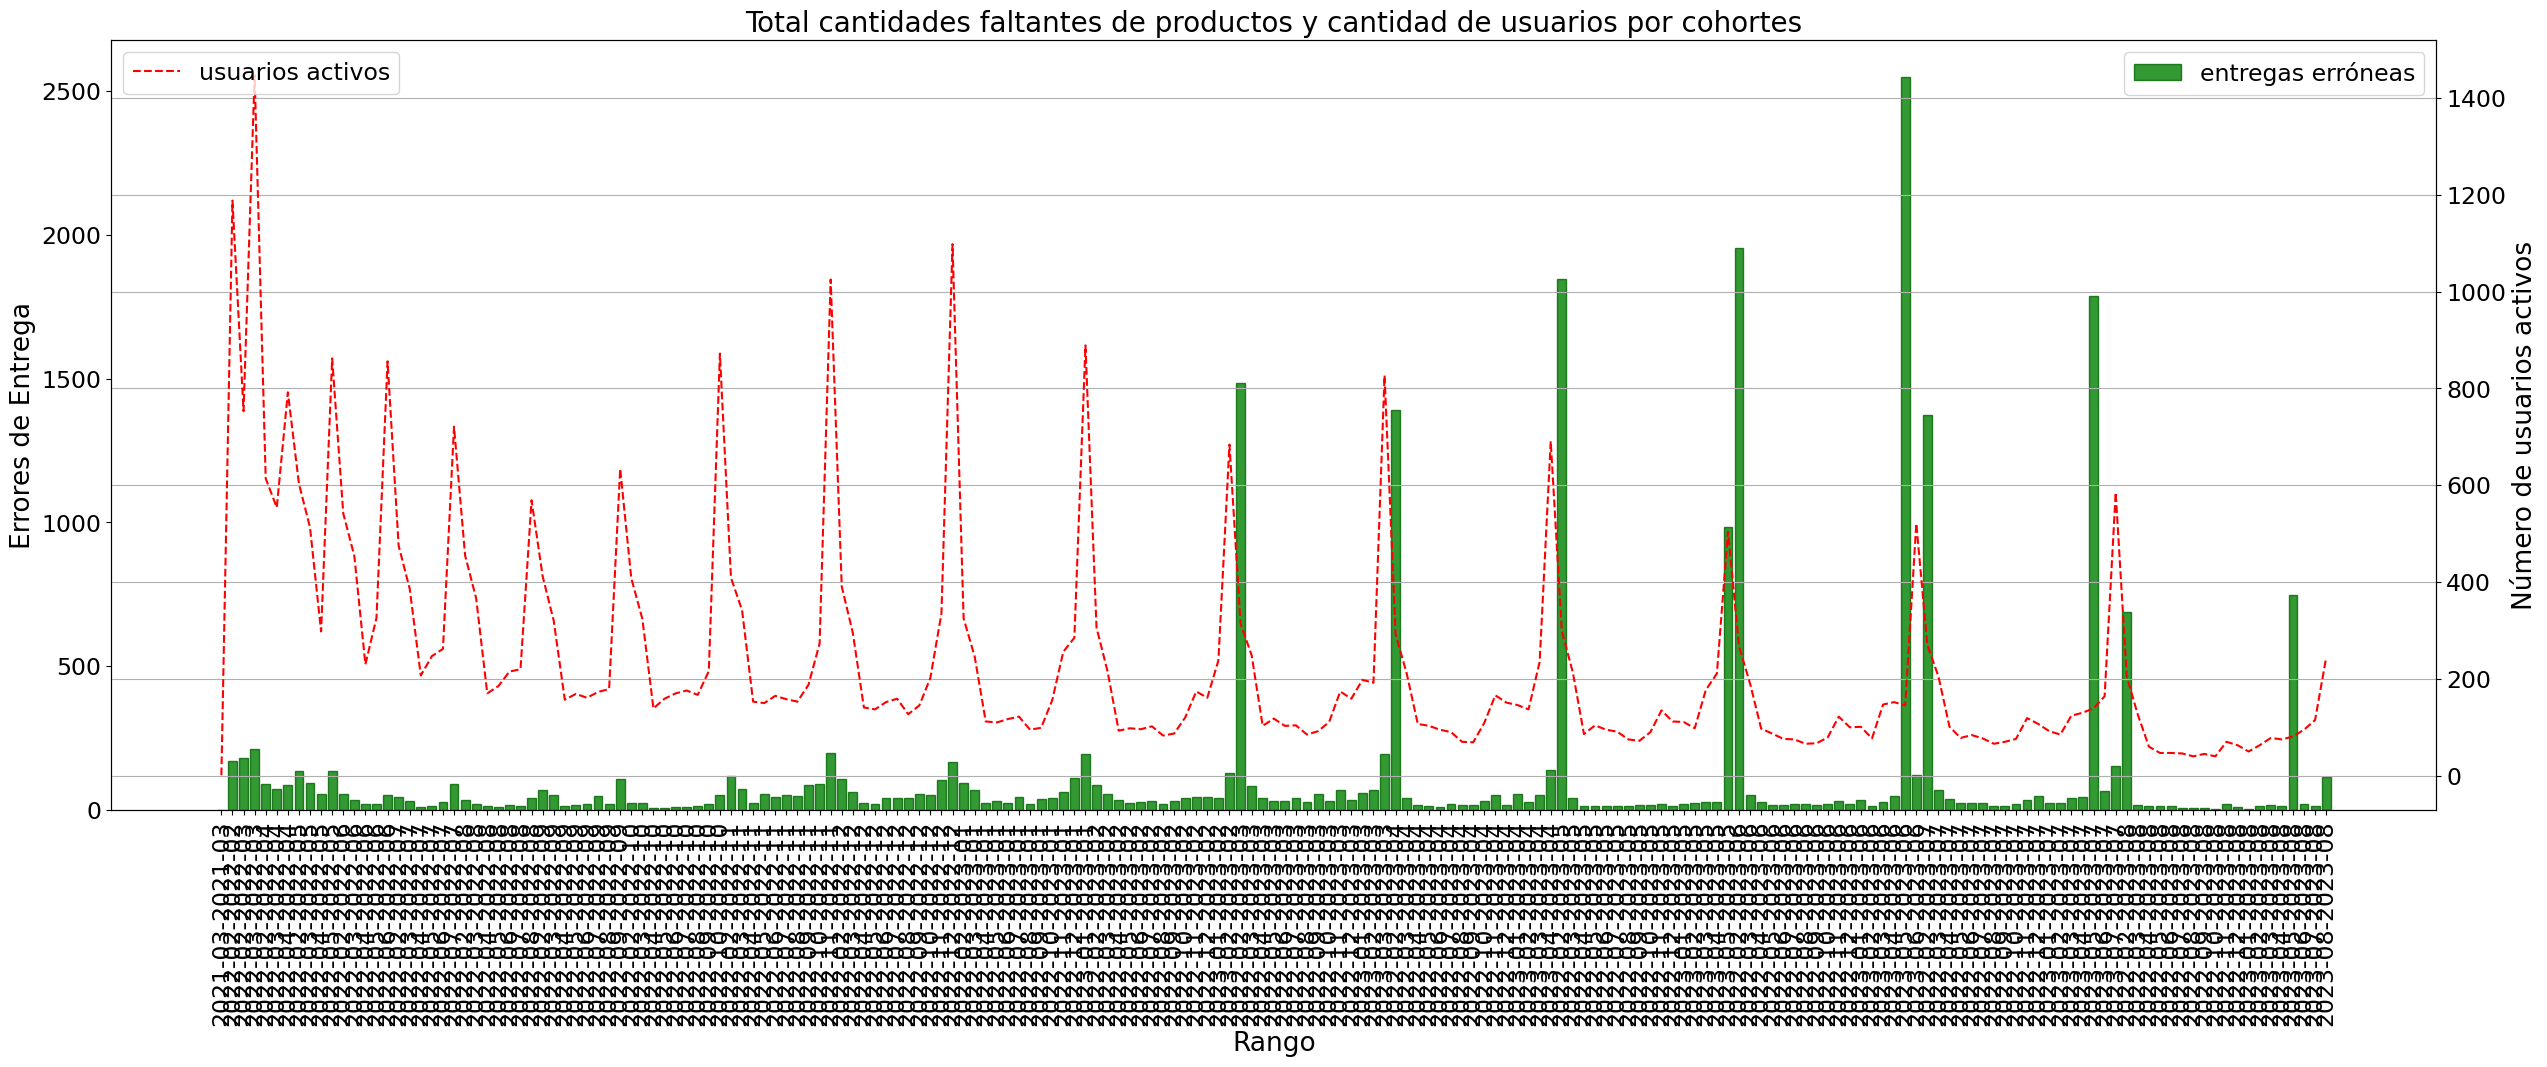

In [17]:
cant_faltante = cohort_ds['err_entregas']
usuarios_activos = cohort_ds['num_user']
rango = [str(c)+"-"+str(m) for c,m in zip(cohort_ds['cohort'],cohort_ds['monthly_created'])]

fig, ax = plt.subplots(figsize=[30,10])

ax2 = ax.twinx()

ax.set_title("Total cantidades faltantes de productos y cantidad de usuarios por cohortes",fontsize=20)
ax.bar(rango,cant_faltante,color="green",edgecolor="darkgreen",alpha=0.8,label='entregas erróneas')
ax2.plot(rango,usuarios_activos,'--r',label='usuarios activos')
ax.set_xlabel('Rango',fontsize=19)
ax.set_ylabel('Errores de Entrega',fontsize=19)
ax2.set_ylabel('Número de usuarios activos',fontsize=19)
ax.set_xticklabels(rango,rotation=90,fontsize=15)
ax.tick_params(labelsize=17)
ax2.tick_params(labelsize=17)
ax.legend(loc = 'upper right',fontsize=17)
ax2.legend(loc = 'upper left',fontsize=17)
plt.grid()
plt.show()

En el gráfico anterior, se observa que hay períodos en donde hubieron altos registros de entregas erróneas, sobre todo en 10 períodos en donde se superaban en 500 entregas erróneas (barras verdes). Cabe destacar, que se consideran como entregas erróneas aquellas donde faltaron productos por entregar, tardanza en la entrega, o simplemente no se hizo la entrega. También se graficaron los usuarios activos en cada período con la finalidad de ver alguna correlación entre la disminución de usuarios activos con el alza de entregas erróneas. Sin embargo la cantidad de usuarios activos era muy cíclica con altos y bajos, por otra parte, el alza de usuarios activos correspondía con el alza de entregas erróneas.

En resumen, estamos viendo que en ciertos cohortes hay una vasta cantidad de entregas erróneas con un harto registro de usuarios activos. Otros cohortes donde hay muchos activos y pocas entregas erróneas. Sería bueno observar qué ocurres en aquellos grupos donde ocurre lo primero.


In [18]:
#identificando los rangos en el cual se identificaron más errores.
idx = cant_faltante.index[cant_faltante>500].tolist()
print("Los cohortes son:\n",cohort_ds.loc[idx,['cohort','monthly_created','diff_period']])

Los cohortes son:
       cohort monthly_created  diff_period
92   2022-02         2023-03           13
106  2022-02         2023-04           14
121  2022-02         2023-05           15
136  2023-05         2023-05            0
137  2022-02         2023-06           16
152  2023-05         2023-06            1
154  2022-02         2023-07           17
169  2023-05         2023-07            2
172  2022-02         2023-08           18
187  2023-05         2023-08            3


In [19]:
tupla2 = zip(cohort_ds.loc[idx,'cohort'],cohort_ds.loc[idx,'monthly_created'])

/tmp/ipykernel_79176/535507195.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(prod,rotation=90,fontsize=25)
/tmp/ipykernel_79176/535507195.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(prod,rotation=90,fontsize=25)
/tmp/ipykernel_79176/535507195.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(prod,rotation=90,fontsize=25)
/tmp/ipykernel_79176/535507195.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(prod,rotation=90,fontsize=25)
/tmp/ipykernel_79176/535507195.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(prod,rotation=90,fontsize=25)
/tmp/ipykernel_79176/535507195.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(prod,rotation=90,fontsize=25

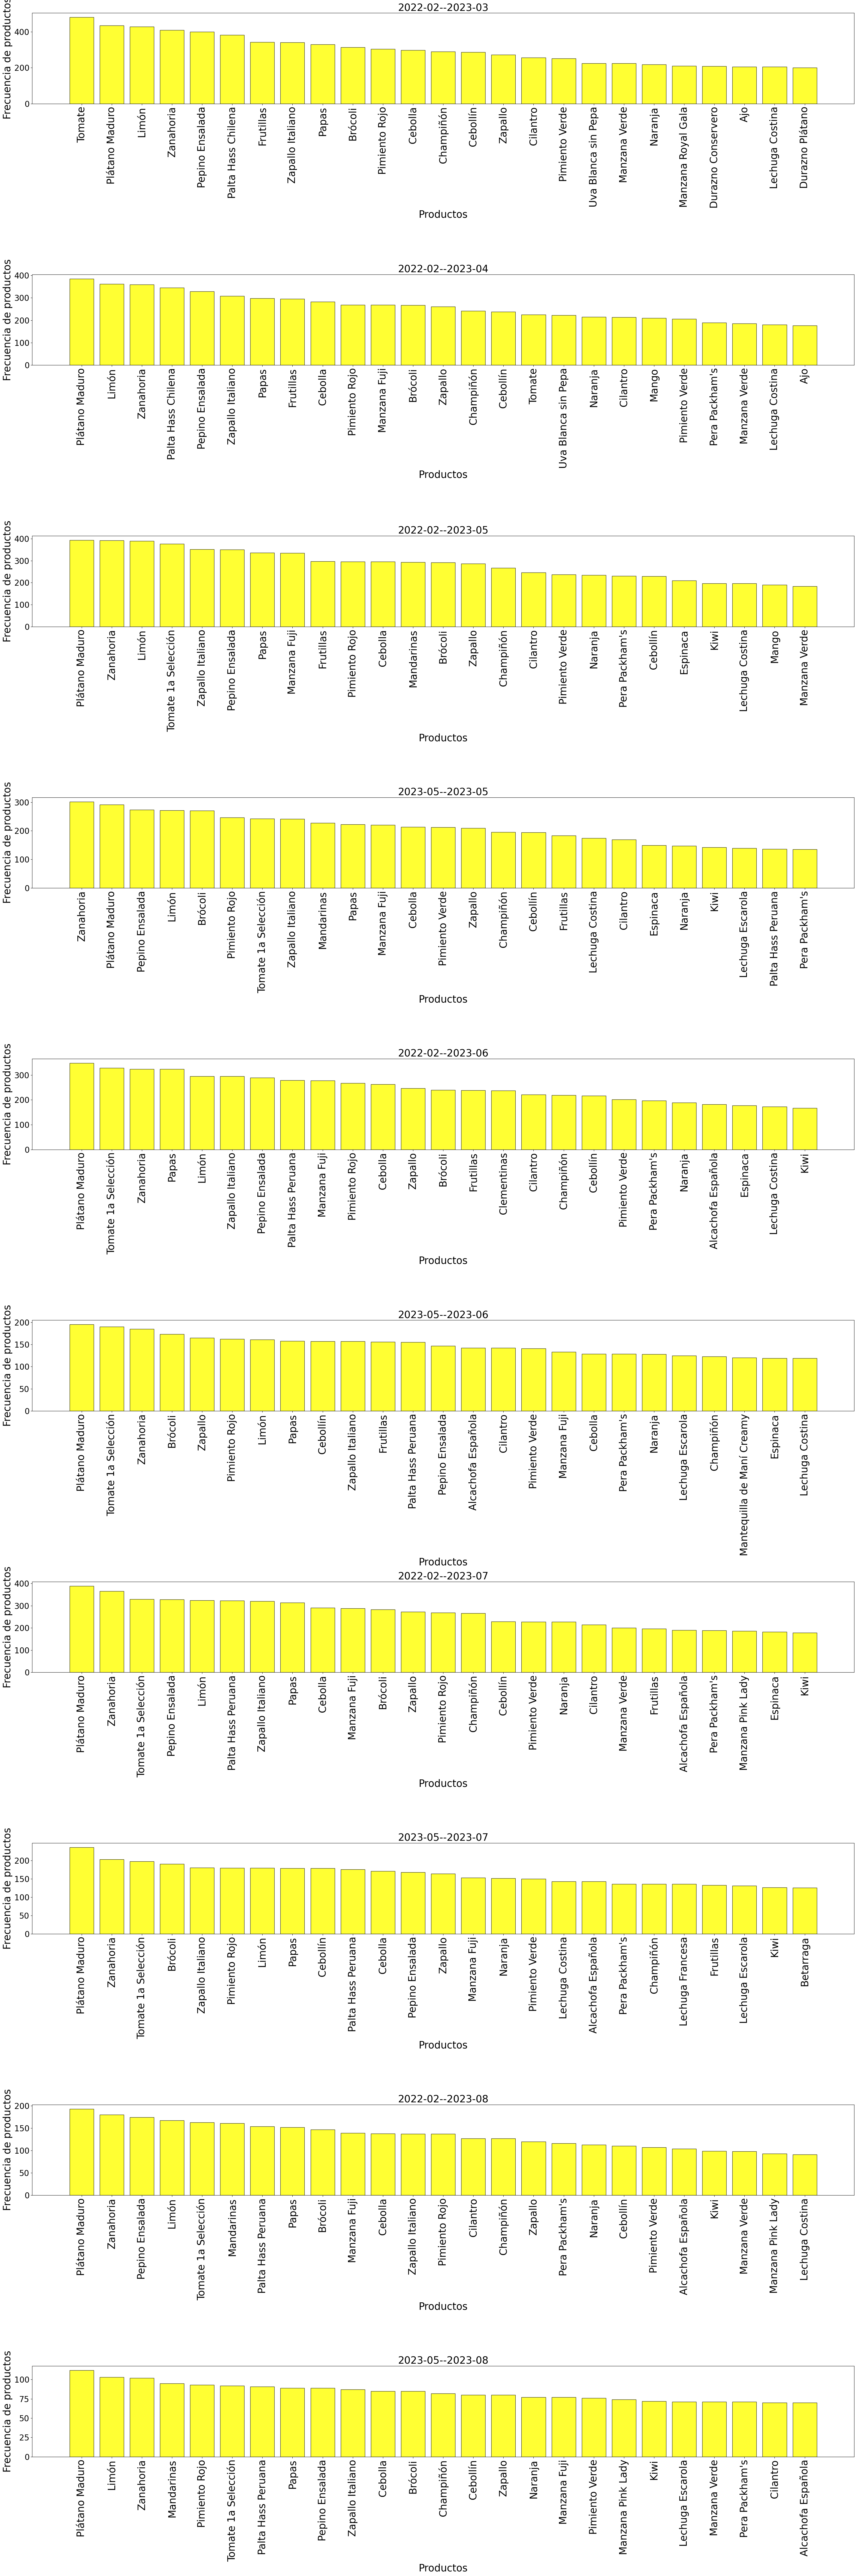

In [20]:
fig, ax = plt.subplots(nrows=10,ncols=1,figsize=[30,90])
j=0
for i,(c,m) in enumerate(tupla2):
    frec_prod = cohort_group.get_group((c,m))['nombre'].value_counts().values
    prod = cohort_group.get_group((c,m))['nombre'].value_counts().index
    
    ax[i].set_title(str(c)+"--"+str(m),fontsize=25)
    ax[i].bar(prod[:25],frec_prod[:25],color="yellow",edgecolor="black",alpha=0.8)
    ax[i].set_xlabel("Productos",fontsize=25)
    ax[i].set_ylabel("Frecuencia de productos",fontsize=25)
    ax[i].tick_params(labelsize=20)
    ax[i].set_xticklabels(prod,rotation=90,fontsize=25)

plt.tight_layout()

plt.show()


___
**Análisis por realizar!**
___